<a href="https://colab.research.google.com/github/vanlybxv/Final_Project_GA/blob/master/Olympics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olympic Games Analysis
## Interesting Data findings for the summer and winter olympic Games 
### 1896 Athens - 2012 London



-- Code block below imports the Modules, functions needed and sets the visual style for the charts & graphs

In [0]:
# import modules needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tell Jupyter to display the data & visuals in the notebook
%matplotlib inline

#set the style of the plots/visuals 
plt.style.use('ggplot')

#set size of plots and font sizse for asthetics
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = (14)


-- Below code block allows the user to import the file **needed**

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving athlete_events.csv to athlete_events.csv
User uploaded file "athlete_events.csv" with length 41500688 bytes


-- Below code block reads the CSV file and checks the number of records
- used a a check to make sure the file is as expected and it has data in it

In [6]:
# read in the data set from the csv file & count number of rows in the data set
df=pd.read_csv('athlete_events.csv')
len(df)

271116

-- Below code block gives the names of the columns
- I like to look at the coumns and see if they make sense to an average user of the tool

In [7]:
# Get the column names
cols = df.columns
for idx, col in enumerate(cols):
  print(idx+1, col)

1 ID
2 Name
3 Sex
4 Age
5 Height
6 Weight
7 Team
8 NOC
9 Games
10 Year
11 Season
12 City
13 Sport
14 Event
15 Medal


# Cleaning and Manipulating the Data Set - Pre-processing
### Includes cretation of new variables, Data Munging

In [0]:
# cleaning and manipulating data
#Remove the 'Arts Competition' because it's not a sport & fill NA records with a blank
filtered_df = df[df["Sport"]!= ("Art Competitions")].fillna(value='').rename(columns={'NOC': 'Country','City': 'Host City','Name':'Athlete' })
#Do I want to make NA into ''?

#Create a count of each medal type and any medal - for summing medal counts later
filtered_df.loc[filtered_df.Medal == 'Gold', 'Medal Count'] = 1
filtered_df.loc[filtered_df.Medal == 'Silver', 'Medal Count'] = 1
filtered_df.loc[filtered_df.Medal == 'Bronze', 'Medal Count'] = 1
#filtered_df.loc[filtered_df.Medal != ('Gold','Silver','Bronze'), 'Medal Count'] = 0
filtered_df.loc[filtered_df.Medal != 'Bronze', 'Bronze Count'] = 0
filtered_df.loc[filtered_df.Medal == 'Gold', 'Gold Count'] = 1
filtered_df.loc[filtered_df.Medal != 'Gold', 'Gold Count'] = 0
filtered_df.loc[filtered_df.Medal == 'Silver', 'Silver Count'] = 1
filtered_df.loc[filtered_df.Medal != 'Silver', 'Silver Count'] = 0
filtered_df.loc[filtered_df.Medal == 'Bronze', 'Bronze Count'] = 1
filtered_df.loc[filtered_df.Medal != 'Bronze', 'Bronze Count'] = 0


#check to make sure that the 'medal count' logic work
#filtered_df[(filtered_df['Silver Count'] < 1) & (filtered_df['Medal Count'] > 0) ].head(10)

#filtered_df[filtered_df['Sport'] == 'Art Competitions'].head(10)
#print(filtered_df)

## First Visual - Top 10 Countries by Total Medals won

Text(0, 0.5, 'Total Medals')

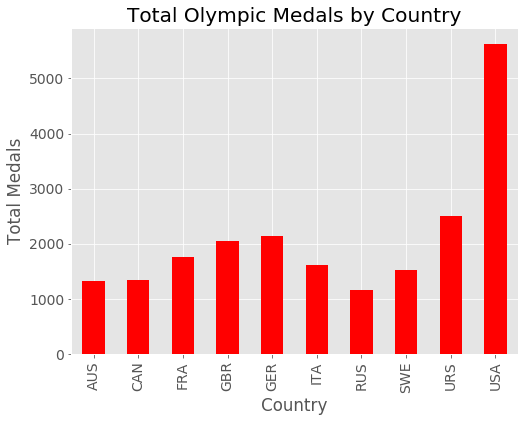

In [21]:
medal_count = filtered_df[['Country','Medal Count']].fillna(value=0)
sum_medal_count = medal_count[['Country','Medal Count']].groupby('Country').sum().sort_values('Medal Count', ascending=False).head(10)
#print(sum_medal_count)
sum_medal_count.groupby('Country')['Medal Count'].sum().plot(kind = 'bar', x='Country', y='Medal Count', color = 'red', title='Total Olympic Medals by Country')
#print(sum_medal_count)
ax =plt.gca()
ax.set_xlabel('Country')
ax.set_ylabel('Total Medals')

## 2nd Visual - Top 10 Countries by Medals Won - stacked by Medal Type

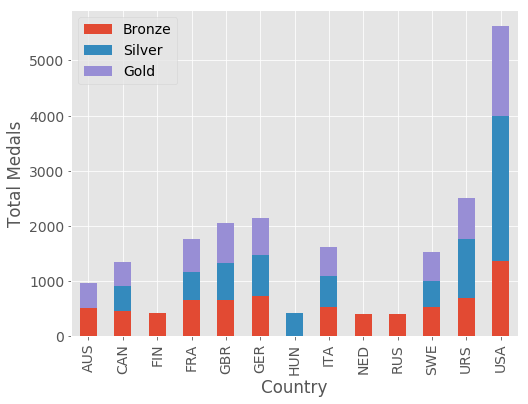

In [38]:
medal_count = filtered_df[['Country','Medal','Medal Count']].fillna(value=0)
sum_medal_count = medal_count[['Country','Medal','Medal Count']].groupby(['Country','Medal']).sum().sort_values('Medal Count', ascending=False).head(30)
sum_medal_count.groupby(['Country','Medal']).sum().unstack().plot(kind='bar',stacked=True)
ax =plt.gca()
ax.set_xlabel('Country')
ax.set_ylabel('Total Medals')
ax.legend(['Bronze','Silver', 'Gold'])

## 3rd Visual - Growth in Total Number of Athletes in Olympics

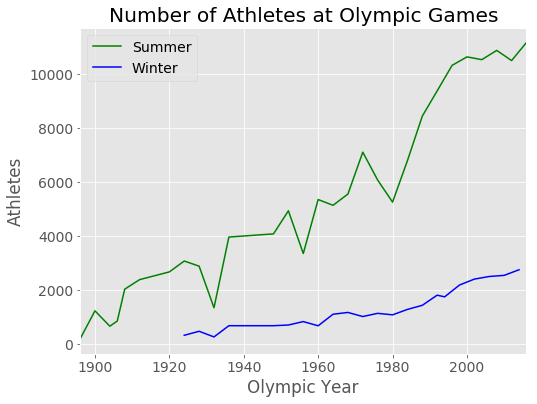

In [28]:

#subset the data for ease of use
athletes = filtered_df[['Year','Season','Athlete']].fillna(value=0)
#split data set into winter and summer olympics to get 2 seperate lines
athletes_summer =athletes[athletes['Season']=='Summer']
athletes_winter =athletes[athletes['Season']=='Winter']
ax =plt.gca() #this gives you multiple plots on the same axis
#create tthe double line chart
athletes_summer.groupby('Year')['Athlete'].nunique().plot(kind = 'line', x='Year', y='Athlete', color = 'green',title = 'Number of Athletes at Olympic Games',ax=ax)
athletes_winter.groupby('Year')['Athlete'].nunique().plot(kind = 'line', x='Year', y='Athlete', color = 'blue',title = 'Number of Athletes at Olympic Games',ax=ax)

# Pretty up the graph
ax.set_xlabel('Olympic Year')
ax.set_ylabel('Athletes')
ax.legend(['Summer','Winter'])
